In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg as LA
import seaborn as sns; sns.set()

# Principal Component Analysis (PCA)
PCA is one of the most popular techniques for dimensionality reduction. Assume your imput data $\textbf{x}$ has $p$ features, i.e. $\textbf{x}=(x_1,x_2,\cdots,x_p)$, then goal is to apply a linear transformation to obtain a new data set:

$$
y=A^T \textbf{x}
\tag{1}
$$ 

in such a way that the features of $y$ are uncorrelated. In a second step, we choose the most important components of $A$.

The steps in PCA are as follows:
1.  Estimate the covariance matrix substracting the mean
2. Perform eigendecomposition to obtain the eigenvectors and eigenvalues $\lambda$
3. Arrange the eigenvalues $\lambda$ in descending order
4. Choose the $m$ largest eigenvevalues $\lambda$ and their corresponding eigenvectors
5. Apply equation (1)

## Visualizing eigenvectors in a two dimensional space
Let's generate some bivariate Gaussian data, get its corresponding eigenvectors and eigenvalues, and visualize them. Hence, no dimensionality reduction in this exameple (no step 5).

In [2]:
np.random.RandomState(123)
N = 300
# Generate the x values as draws from the multivariate normal distributions
cov   = [[2, 1.1],
         [1.1, 1]]
mu = [0, 0]
# Simple way of drawing random numbers from the multivariate normal distribution        
X = np.random.multivariate_normal(mu, cov, N)

In [3]:
# STEP 1
X_mean = X.mean(axis=0)
X -= X_mean
# covariance mat 
C = np.cov(X.T)  

In [4]:
# STEP 2
# get eigenvectors (v) and eigenvalues (w)
w, v = LA.eig(C)

In [5]:
# STEP 3
# get idx in descending order based on w
inx = w.argsort()[::-1]

# sort eig.vectors and eig.values
w, v = w[inx], v[:, inx]

In [6]:
# STEP 4
m = 2
# get the first m eig.vectors and eig.values
w = w[:m]
v = v[:, :m]

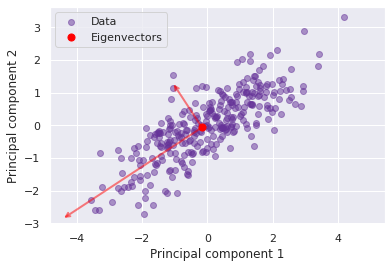

In [7]:
# plot data together with eigenvectors
ax = plt.gca()
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
plt.scatter(X[:, 0], X[:, 1], c='#663399', alpha=0.5)
plt.scatter(X_mean[0], X_mean[1], c='red', s=50)
plt.axis('equal')

for length, vector in zip(w, v):
    vector[0] = -vector[0]               
    dir_ = vector * 3  * np.sqrt(length) # 3 standard deviations
    start = X_mean; end = start + dir_
    arrowprops = dict(arrowstyle='->', linewidth=2, 
                      shrinkA=0, shrinkB=0, color='red', alpha=0.5)
    ax.annotate('', xy=end, xytext=start, arrowprops=arrowprops)
plt.legend(['Data', 'Eigenvectors'])
plt.show()


**NOTE:** The total variance of the elements of $\textbf{x}$ (assuming $\textbf{x}$ has 0 mean) is equal to the sum of the eigenvalues, i.e. $\sum_{i=1}^p \lambda_i$

## Dimensionality reduction with PCA
Let's generate some data with 100 features and use PCA to reduce the dimensionality from 100 to 2 🧑

In [8]:
rng = np.random.RandomState(1)
dim = 100
N = 300
X = np.dot(rng.rand(dim, dim), rng.randn(dim, N)).T

In [9]:
# STEP 1
X_mean = X.mean(axis=0)
X -= X_mean
# covariance mat 
C = np.cov(X.T)  

# STEP 2
# get eigenvectors (v) and eigenvalues (w)
w, v = LA.eig(C)

# STEP 3
# get idx in descending order based on w
inx = w.argsort()[::-1]
# sort eig.vectors and eig.values
w, v = w[inx], v[:, inx]

# STEP 4
# select the number of components
m = 2
# get the first m eig.vectors and eig.values
w = w[:m]
v = v[:, :m]

# STEP 5
# project the data
pca = X.dot(v) 

**NOTE:** If visualization of the PCA transformation is not necessary, then it is common to choose the number of $m$ *principal components* based on the variability of the original data that they are able to capture. Remember that the $\sum_{i=1}^p \lambda_i$ equal the total variance in the original data. Hence, the *i*'th eigenvalue $\lambda_i$ captures 
$$
\frac{\lambda_i}{\sum_{k=1}^p \lambda_k}
$$
of the variation in the original data $\textbf{x}$. Therefore, the $m$ largest eigenvalues, captures
$$
\frac{\lambda_{j=1}^m}{\sum_{k=1}^p \lambda_k}
$$
of the total variability.

At this point, the variable called `pca` is a two dimensional vector that was achived by used the top-2 eigenvalues. Now, we get the eigenvectors and eigenvalues for the `pca` data to visualize the transformed data!

In [10]:
# covariance mat 
C = np.cov(pca.T)  

# get eigenvectors (v) and eigenvalues (w)
w, v = LA.eig(C)

# get idx in descending order based on w
inx = w.argsort()[::-1]

# sort eig.vectors and eig.values
w, v = w[inx], v[:, inx]

Visualize the data transformation along with their correspoing eigenvectors!

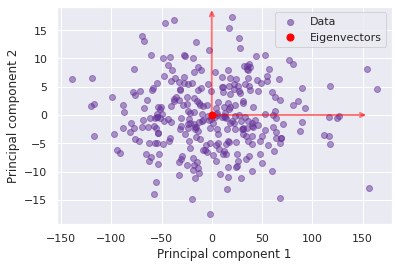

In [11]:
pca_mean = pca.mean(axis=0)
ax = plt.gca()
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
plt.scatter(pca[:, 0], pca[:, 1], c='#663399', alpha=0.5)
plt.scatter(pca_mean[0], pca_mean[1], c='red', s=50)

for length, vector in zip(w, v):
    vector[0] = -vector[0] 
    dir_ = vector * 3  * np.sqrt(length)
    arrowprops = dict(arrowstyle='->', linewidth=2, shrinkA=0,
                      shrinkB=0, color='red', alpha=0.5)
    dir_[0] = -dir_[0]
    start = pca_mean; end = start + dir_
    ax.annotate('', xy = end, xytext = start, arrowprops=arrowprops)

plt.legend(['Data', 'Eigenvectors'])
plt.show()

## Clustering with PCA

In [12]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data

In [13]:
m = 2
# STEP 1
X_mean = X.mean(axis=0)
X -= X_mean
# covariance mat 
C = np.cov(X.T)  

# STEP 2
# get eigenvectors (v) and eigenvalues (w)
w, v = LA.eig(C)

# STEP 3
# get idx in descending order based on w
inx = w.argsort()[::-1]
# sort eig.vectors and eig.values
w, v = w[inx], v[:, inx]

# STEP 4
# select the number of components
m = 2
# get the first m eig.vectors and eig.values
w = w[:m]
v = v[:, :m]
# STEP 5
# project the data
pca = X.dot(v) 

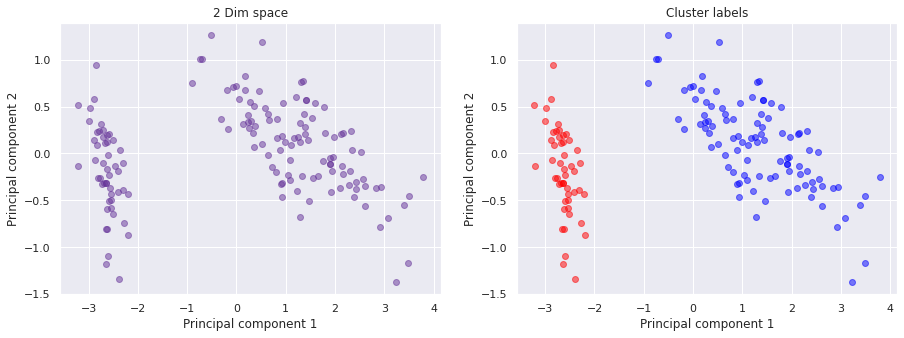

In [14]:
from IPython.core.pylabtools import figsize
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].set_xlabel('Principal component 1')
ax[0].set_ylabel('Principal component 2')
ax[0].set_title('2 Dim space')
ax[0].scatter(pca[:, 0], pca[:, 1], c='#663399', alpha=0.5)


ax[1].set_xlabel('Principal component 1')
ax[1].set_ylabel('Principal component 2')
ax[1].set_title('Cluster labels')
ax[1].scatter(pca[pca[:,0]<-1.5, 0], pca[pca[:,0]<-1.5, 1], c='red', alpha=0.5)
ax[1].scatter(pca[pca[:,0]>-1.5, 0], pca[pca[:,0]>-1.5, 1], c='blue', alpha=0.5)
plt.show()